In [1]:
from pretrain_dreambooth import create_blipv2_model_and_preprocess, ProjLayer

In [3]:
import torch, os

blip_model, _ = create_blipv2_model_and_preprocess(is_train=False)
blip_model.load_state_dict(torch.load(os.path.join(checkpoint_dir, "blip_model/blip_weight.pt"), map_location="cpu"))

Creating model
Resizing position embedding grid-size from %s to %s (16, 16) (28, 28)
_IncompatibleKeys(missing_keys=[], unexpected_keys=['visual.proj', 'visual.ln_post.weight', 'visual.ln_post.bias', 'visual.transformer.resblocks.23.attn.in_proj_weight', 'visual.transformer.resblocks.23.attn.in_proj_bias', 'visual.transformer.resblocks.23.attn.out_proj.weight', 'visual.transformer.resblocks.23.attn.out_proj.bias', 'visual.transformer.resblocks.23.ln_1.weight', 'visual.transformer.resblocks.23.ln_1.bias', 'visual.transformer.resblocks.23.mlp.c_fc.weight', 'visual.transformer.resblocks.23.mlp.c_fc.bias', 'visual.transformer.resblocks.23.mlp.c_proj.weight', 'visual.transformer.resblocks.23.mlp.c_proj.bias', 'visual.transformer.resblocks.23.ln_2.weight', 'visual.transformer.resblocks.23.ln_2.bias'])
freeze class_embedding
freeze positional_embedding
freeze conv1.weight
freeze ln_pre.weight
freeze ln_pre.bias
freeze transformer.resblocks.0.attn.in_proj_weight
freeze transformer.resblocks.0.

<All keys matched successfully>

In [4]:
proj_layer = ProjLayer(in_dim=768, out_dim=768, hidden_dim=3072, drop_p=0.1, eps=1e-12)
proj_layer.load_state_dict(torch.load(os.path.join(checkpoint_dir, "proj_layer/proj_weight.pt"), map_location="cpu"))

<All keys matched successfully>

In [5]:
from transformers import CLIPTokenizer

tokenizer = CLIPTokenizer.from_pretrained(
    checkpoint_dir,
    subfolder="tokenizer",
    revision=None,
)

In [6]:
from modeling_clip import CtxCLIPTextModel

text_encoder = CtxCLIPTextModel.from_pretrained(
    checkpoint_dir,
    subfolder="text_encoder",
    revision=None,
)

In [7]:
from diffusers import AutoencoderKL, UNet2DConditionModel

vae = AutoencoderKL.from_pretrained(
    checkpoint_dir,
    subfolder="vae",
)
unet = UNet2DConditionModel.from_pretrained(
    checkpoint_dir,
    subfolder="unet",
)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

blip_model.to(device)
proj_layer.to(device)
text_encoder.to(device)
vae.to(device)
unet.to(device)

blip_model.eval()
proj_layer.eval()
text_encoder.eval()
vae.eval()
unet.eval()

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0): Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (attn1): CrossAttention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features=320, bias=False)
                (to_out): ModuleList(
                

In [9]:
from diffusers.schedulers import DDIMScheduler

scheduler = DDIMScheduler(
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
)

## Re-run below

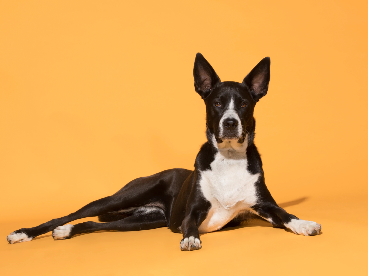

In [190]:
from PIL import Image

# ==== a good example configuration ======
# checkpoint_dir = "output/pretrain/65000/"

# # image_path = "/export/home/workspace/dreambooth/diffusers/data/class-images/dog/59-3c73d5084e47957ae7ea935c3a471871096dfc1d.jpg"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/class-images/dog/50-f87f6d926bdac81f65855d0b5d6a8cd6993c3c40.jpg"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/class-images/dog/80-83159b6909c21579ce279255f8c4106e6d0207d8.jpg"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/NationalGeographic_2731043_4x3.webp"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/flower1.jpeg"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/5850.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/NationalGeographic_2731043_4x3.webp"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/Pembroke-Welsh-Corgi-standing-outdoors-in-the-fall.jpeg"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/download (7).jpeg"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/2945.webp"
# # image_path = "/export/home/workspace/dreambooth/diffusers/data/yb-cat/WechatIMG115.jpeg"
# image = Image.open(image_path).convert("RGB")

# # subject = "corgi dog"
# subject = "dog"
# # prompt = "A dog on the street."
# prompt = "A dog on the street."
# # subject = "Siamese cat, Siamese"
# # subject = "cat"
# # prompt = "A cat."

# # guidance_scale = 7.5
# guidance_scale = 12.5 

# height, width = 512, 512

# seed = 48617

# num_inference_steps = 250

# eta = 1

# checkpoint_dir = "output/pretrain/65000/"
# checkpoint_dir = "output/pretrain/75000/"
checkpoint_dir = "/export/home/workspace/dreambooth/diffusers/output/pretrain-v0-success/65000"

# image_path = "/export/home/workspace/dreambooth/diffusers/data/class-images/dog/59-3c73d5084e47957ae7ea935c3a471871096dfc1d.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/class-images/dog/50-f87f6d926bdac81f65855d0b5d6a8cd6993c3c40.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/class-images/dog/80-83159b6909c21579ce279255f8c4106e6d0207d8.jpg"
image_path = "/export/home/workspace/dreambooth/diffusers/data/NationalGeographic_2731043_4x3.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/flower1.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/5850.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/NationalGeographic_2731043_4x3.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/corgi-hat.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/Pembroke-Welsh-Corgi-standing-outdoors-in-the-fall.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/download (7).jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/2945.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/41RZPJKf7gL._AC_SY580_.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/turtle.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cat-dog.webp"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/cat-imgnet.jpeg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/purple-flower.jpg"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/rose-bleu.png"
# image_path = "/export/home/workspace/dreambooth/diffusers/data/yb-cat/WechatIMG115.jpeg"
image = Image.open(image_path).convert("RGB")

# subject = "corgi dog"
# subject = "dog"
# subject = "cat"
# prompt = "A dog on the street."
# prompt = "A rabbit."
# prompt = "A giraffe."
# prompt = "A dog behind the space suit helmet in outer space, realistic award-winning."
# prompt = "A dog epic album cover, tending on artstation, award - winning art"
# prompt = "Anthropomorphic dog fursona sitting in a chair at home lit by the sunset, furry art, trending on artstation, digital art, kawacy, trending on furaffinity"
# prompt = "A cute cyberpunk dog by greg rutkowski and wlop, purple blue color scheme, high key lighting, volumetric light, digital art, highly detailed, fine detail, intricate, ornate, complex, octane render, unreal engine, photorealistic"
# prompt = "A dog beautiful romantic barroque painting portrait."
# prompt = "A flower wreath, zbrushcentral, realistic award-winning." 
# prompt = "A dog in cosmos painting, leonardo da vinci style"
# prompt = "A dog swimming in the ocean."
# prompt = "A turtle in cosmos painting, leonardo da vinci style"
# prompt = "A dog behind the space suit helmet in outer space, realistic award-winning"
prompt = "A dog at the great wall of china, photorealistic"
# prompt = "A cat behind the space suit helmet in outer space, realistic award-winning"
# prompt = "A turtle behind the space suit helmet in outer space, realistic award-winning"
# prompt = "A cat taking a selfie in front of the eiffel tower, photorealistic"
# prompt = "A dog with a pearl earring by johannes vermeer"
# prompt = "A cat."
# subject = "Siamese cat, Siamese"
# subject = "turtle"
subject = "dog"
# prompt = "A cat."

guidance_scale = 12.5
# guidance_scale = 12.5 

height, width = 512, 512
# height, width = 768, 768

# seed = 387658222
seed = 3876581
# seed = 487612222

num_inference_steps = 250

eta = 1

image = Image.open(image_path).convert("RGB")

w, h = image.size
f = 368 / w

display(image.resize((int(f * w), int(f * h)), Image.NEAREST))

In [191]:
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

from BLIP2.constant import OPENAI_DATASET_MEAN, OPENAI_DATASET_STD

image_size = 392

image_transform = transforms.Compose(
        [
            transforms.Resize(
                image_size, interpolation=InterpolationMode.BICUBIC
            ),
            transforms.CenterCrop(image_size),
            transforms.ToTensor(),
            transforms.Normalize(OPENAI_DATASET_MEAN, OPENAI_DATASET_STD),
        ]
    )

image = image_transform(image).unsqueeze(0).to(device)


In [192]:

blip_embeddings = blip_model(
    # image=batch["input_images"].to(dtype=weight_dtype),
    image=image,
    text=[subject]
)

In [193]:
blip_embeddings.shape

torch.Size([1, 32, 768])

In [194]:
ctx_embeddings = proj_layer(blip_embeddings)
print(ctx_embeddings.shape)

torch.Size([1, 32, 768])


In [195]:
def numpy_to_pil(images):
    """
    Convert a numpy image or a batch of images to a PIL image.
    """
    if images.ndim == 3:
        images = images[None, ...]
    images = (images * 255).round().astype("uint8")
    pil_images = [Image.fromarray(image) for image in images]

    return pil_images

In [196]:
import inspect

text_input = tokenizer(
    prompt,
    padding="max_length",
    max_length=25,
    truncation=True,
    return_tensors="pt",
)
print(text_input.input_ids.shape)

with torch.no_grad():
    text_embeddings = text_encoder(
        input_ids=text_input.input_ids.to(device),
        ctx_embeddings=ctx_embeddings,
        ctx_begin_pos=[2],
    )[0]

print(text_embeddings.shape)

torch.Size([1, 25])
torch.Size([1, 57, 768])


In [197]:
# here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
# of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
# corresponds to doing no classifier free guidance.
do_classifier_free_guidance = guidance_scale > 1.0
# get unconditional embeddings for classifier free guidance
if do_classifier_free_guidance:
    max_length = text_input.input_ids.shape[-1]
    uncond_input = tokenizer(
        [""],
        padding="max_length",
        max_length=max_length,
        return_tensors="pt",
    )
    with torch.no_grad():
        uncond_embeddings = text_encoder(
            input_ids=uncond_input.input_ids.to(device),
            ctx_embeddings=ctx_embeddings,
            ctx_begin_pos=[1],
        )[0]

    # For classifier free guidance, we need to do two forward passes.
    # Here we concatenate the unconditional and text embeddings into a single batch
    # to avoid doing two forward passes
    text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

print(text_embeddings.shape)

torch.Size([2, 57, 768])


In [198]:
# get the initial random noise unless the user supplied it
latents_shape = (1, unet.in_channels, height // 8, width // 8)
if seed is not None:
    generator = torch.Generator(device=device)
    generator = generator.manual_seed(seed)
latents = torch.randn(
    latents_shape,
    generator=generator,
    device=device,
)

# set timesteps
accepts_offset = "offset" in set(
    inspect.signature(scheduler.set_timesteps).parameters.keys()
)
extra_set_kwargs = {}
if accepts_offset:
    extra_set_kwargs["offset"] = 1

scheduler.set_timesteps(num_inference_steps, **extra_set_kwargs)

# if we use LMSDiscreteScheduler, let's make sure latents are mulitplied by sigmas
# if isinstance(scheduler, LMSDiscreteScheduler):
#     latents = latents * scheduler.sigmas[0]

# prepare extra kwargs for the scheduler step, since not all schedulers have the same signature
# eta (η) is only used with the DDIMScheduler, it will be ignored for other schedulers.
# eta corresponds to η in DDIM paper: https://arxiv.org/abs/2010.02502
# and should be between [0, 1]
accepts_eta = "eta" in set(
    inspect.signature(scheduler.step).parameters.keys()
)
extra_step_kwargs = {}
if accepts_eta:
    extra_step_kwargs["eta"] = eta


In [199]:
type(unet)

diffusers.models.unet_2d_condition.UNet2DConditionModel

100%|██████████| 250/250 [00:17<00:00, 14.70it/s]


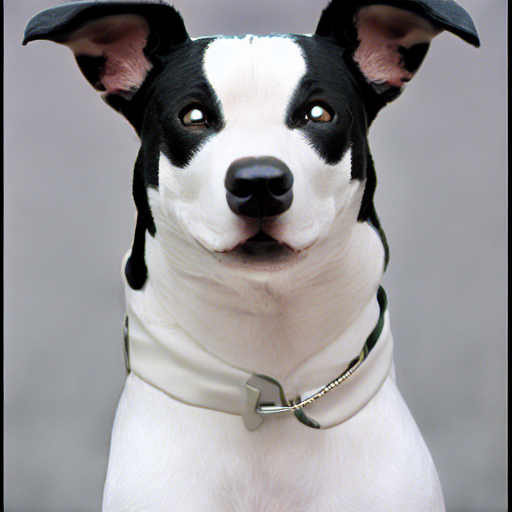

In [200]:
from tqdm import tqdm

iterator = tqdm(scheduler.timesteps)

for i, t in enumerate(iterator):
    # expand the latents if we are doing classifier free guidance
    latent_model_input = (
        torch.cat([latents] * 2) if do_classifier_free_guidance else latents
    )

    # predict the noise residual
    with torch.no_grad():
        noise_pred = unet(
            latent_model_input, t, encoder_hidden_states=text_embeddings
        )["sample"]

    # perform guidance
    if do_classifier_free_guidance:
        noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        noise_pred = noise_pred_uncond + guidance_scale * (
            noise_pred_text - noise_pred_uncond
        )

    # compute the previous noisy sample x_t -> x_t-1
    latents = scheduler.step(
        noise_pred, t, latents, **extra_step_kwargs
    )["prev_sample"]

# scale and decode the image latents with vae
latents = 1 / 0.18215 * latents
with torch.no_grad():
    out_image = vae.decode(latents).sample

out_image = (out_image / 2 + 0.5).clamp(0, 1)
out_image = out_image.cpu().permute(0, 2, 3, 1).numpy()

out_image = numpy_to_pil(out_image)
display(out_image[0])
